In [2]:
import pandas as pd


data = pd.read_excel("all_transformation_data.xlsx")

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'input_target_molecule_smiles',
       'mapped_input_target_molecule_smiles', 'target_substructure_smarts',
       'substructure_atom_map', 'disconnection_map', 'synthon_a',
       'synthon_a_label', 'synthon_b', 'synthon_b_label',
       'synthon_a_building_block_class', 'synthon_a_building_block_label',
       'synthon_b_building_block_class', 'synthon_b_building_block_label',
       'synthon_a_building_block_smiles', 'synthon_a_building_block_cas',
       'synthon_a_building_block_price', 'synthon_a_building_block_material',
       'synthon_b_building_block_smiles', 'synthon_b_building_block_cas',
       'synthon_b_building_block_price', 'synthon_b_building_block_material',
       'aromatic_a', 'benzylic_a', 'alpha_het_a', 'alpha_allyl_a',
       'alpha_carbonyl_a', 'aromatic_b', 'benzylic_b', 'alpha_het_b',
       'alpha_allyl_b', 'alpha_carbonyl_b', 'bond_formed',
       'synth_class_specific_a', 'synth_class_specific_b'],
      dtype='object')

In [4]:
group1 = data.groupby("synth_class_specific_a")

In [18]:
sets = {}

for i,i2 in data.iterrows():
    v = [i2["synth_class_specific_a"], i2["synth_class_specific_b"]]
    v.sort()
    v = str(v[0] + "-" + v[1])
    
    if "alkyl alcohol-alkyl amine" in v:
        print(v, i2["synthon_a_building_block_smiles"], i2["synthon_b_building_block_smiles"], i2["input_target_molecule_smiles"])

    if v not in sets:
        sets[v] = 0
    sets[v] = sets[v] + 1

alkyl alcohol-alkyl amine CC(O)Cc1ccccc1 NN C[C@H](N)Cc1ccccc1
alkyl alcohol-alkyl amine CC(N)Cc1ccccc1 NO C[C@H](N)Cc1ccccc1
alkyl alcohol-alkyl amine CC(C)C(N)C(=O)O NN1CCCC1 CC(C)[C@H](N)C(=O)N1CCCC1
alkyl alcohol-alkyl amine CC(=O)O NN CC(N)=O
alkyl alcohol-alkyl amine CC(N)=O NO CC(N)=O
alkyl alcohol-alkyl amine NC(C(=O)O)c1cc(O)cc(O)c1 NO N[C@H](C(=O)O)c1cc(O)cc(O)c1
alkyl alcohol-alkyl amine CSCCC(N)C(=O)O NO CSCCC(N)C(=O)O
alkyl alcohol-alkyl amine OCc1ccccc1O NN NCc1ccccc1O
alkyl alcohol-alkyl amine NCc1ccccc1O NO NCc1ccccc1O
alkyl alcohol-alkyl amine OC1(c2cccs2)CCCCC1 NN1CCCCC1 c1csc(C2(N3CCCCC3)CCCCC2)c1
alkyl alcohol-alkyl amine O=C(O)c1ccccc1O NN NC(=O)c1ccccc1O
alkyl alcohol-alkyl amine NC(=O)c1ccccc1O NO NC(=O)c1ccccc1O
alkyl alcohol-alkyl amine NC(CCC(=O)O)C(=O)O NN NC(=O)[C@@H](N)CCC(=O)O
alkyl alcohol-alkyl amine O=C(O)C(O)CO NNC(=O)NCc1ccccc1 O=C(NCc1ccccc1)NC[C@@H](O)C(=O)O
alkyl alcohol-alkyl amine OCc1ccc(-c2cccs2)cc1 NN NCc1ccc(-c2cccs2)cc1
alkyl alcohol-alkyl a

In [13]:
def sort_dictionary_by_value(dictionary):
    sorted_items = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    sorted_keys = [item[0] for item in sorted_items]
    sorted_values = [item[1] for item in sorted_items]
    return sorted_keys, sorted_values

In [14]:
labels, hits = sort_dictionary_by_value(sets)

In [15]:
for i,k in enumerate(labels):
    # if "other_hydrogen" in k:
        # continue
    print(i, k, hits[i])

0 alkyl alcohol-other_hydrogen 4023
1 alkyl amine-other_hydrogen 3964
2 alkyl acid-other_hydrogen 3320
3 other_hydrogen-other_hydrogen 3223
4 alkyl alcohol-alkyl amine 2510
5 alkyl chloride-other_hydrogen 2099
6 alkyl acid-alkyl amine 1728
7 alkyl bromide-other_hydrogen 1692
8 alkyl acid-alkyl alcohol 1648
9 alpha_carbonyl-other_hydrogen 1311
10 alkyl alcohol-alkyl alcohol 1310
11 alkyl boronate-other_hydrogen 1219
12 alkyl acid-alkyl acid 1212
13 alkyl amine-alkyl amine 1209
14 alkyl amine-alkyl chloride 1005
15 alkyl acid-alkyl chloride 992
16 alkyl iodide-other_hydrogen 952
17 aryl alcohol-other_hydrogen 950
18 alkyl alcohol-alkyl chloride 948
19 aryl amine-other_hydrogen 948
20 alkyl alcohol-alkyl boronate 924
21 aryl chloride-other_hydrogen 914
22 alkyl alcohol-alpha_carbonyl 885
23 alkyl amine-alpha_carbonyl 864
24 alkyl amine-alkyl bromide 833
25 alkyl acid-alkyl bromide 824
26 aryl acid-other_hydrogen 821
27 alkyl alcohol-alkyl bromide 777
28 alkyl acid-alpha_carbonyl 672
29 al

/var/folders/8k/w__0g4xs7rj0xv7hk3dqm71w0000gn/T/ipykernel_56305/4171650223.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=6, fontfamily='arial')


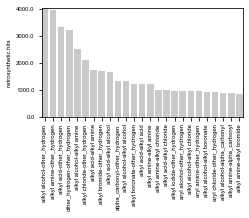

In [17]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(3.6,2))
ax.bar(range(0,25), hits[0:25], color='#cac9c9')

# ax.set_xticks(range(0,len(hits)))
ax.set_xticks(range(0,25))
ax.set_xticklabels(labels[0:25], fontsize=6, fontfamily='arial', rotation=90)

# ax.set_xticks([0, 4, 6, 8, 10, 12, 13, 23])
# ax.set_xticklabels([labels[0], labels[4],labels[6],\
#                     labels[8],labels[10], labels[12], labels[13], \
#                     labels[23]], fontsize=6, fontfamily='arial', rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=6, fontfamily='arial')
# ax.set_yticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
# ax.set_yticklabels([0, 50000, 100000, 150000, 200000, 250000, 300000], fontsize=6, fontfamily='arial')
# ax.set_ylim([0,300000])

ax.set_ylabel("retrosynthetic hits", fontsize=6, fontfamily='arial')
# ax.set_xlabel("building block class", fontsize=6, fontfamily='arial')
# ax.set_title("building block occurence in SigmaAldrich Catalog", fontsize=6, fontfamily='arial')

plt.subplots_adjust(hspace=0, wspace=0)
plt.margins(0,0)

plt.savefig(f"reaction_histogram.png", dpi=900, bbox_inches='tight', pad_inches = 0)